This project makes use of pandas DataFrames to read and analyze a CSV file containing flight delay data.

First, we read the CSV and confirm by printing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('delaydata.csv', index_col='Airline')
data

,Destination,On Time,Delayed
Airline,,,
Alaska,Los Angeles,497,62
Alaska,Phoenix,221,12
Alaska,San Diego,212,20
Alaska,San Francisco,503,102
Alaska,Seattle,1841,305
AM West,Los Angeles,694,117
AM West,Phoenix,4840,415
AM West,San Diego,383,65
AM West,San Francisco,320,129


Next we add columns for Total Flights and Percentage Delayed

In [2]:
data['Total Flights'] = data['On Time'] + data['Delayed']
data['Percent Delayed'] = (data['Delayed'] / data['Total Flights'] * 100)
data

,Destination,On Time,Delayed,Total Flights,Percent Delayed
Airline,,,,,
Alaska,Los Angeles,497,62,559,11.091234
Alaska,Phoenix,221,12,233,5.150215
Alaska,San Diego,212,20,232,8.620690
Alaska,San Francisco,503,102,605,16.859504
Alaska,Seattle,1841,305,2146,14.212488
AM West,Los Angeles,694,117,811,14.426634
AM West,Phoenix,4840,415,5255,7.897241
AM West,San Diego,383,65,448,14.508929
AM West,San Francisco,320,129,449,28.730512


We isolate the Destination and Percent Delayed for Alaska airline.

In [3]:
alaska = data.loc['Alaska']
alaska

,Destination,On Time,Delayed,Total Flights,Percent Delayed
Airline,,,,,
Alaska,Los Angeles,497,62,559,11.091234
Alaska,Phoenix,221,12,233,5.150215
Alaska,San Diego,212,20,232,8.620690
Alaska,San Francisco,503,102,605,16.859504
Alaska,Seattle,1841,305,2146,14.212488


We further isolate the Destination and Percent Delayed values into a Series.

In [4]:
alaska_delays = pd.Series(alaska['Percent Delayed'].values, index=alaska['Destination'])
alaska_delays

Destination
Los Angeles      11.091234
Phoenix           5.150215
San Diego         8.620690
San Francisco    16.859504
Seattle          14.212488
dtype: float64

We use the Series data to form a bar chart.

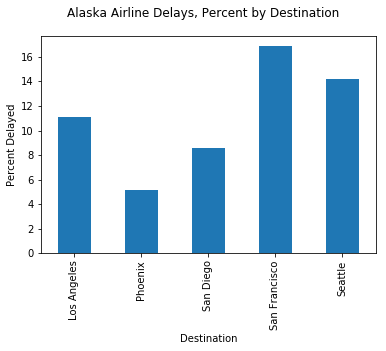

In [5]:
alaska_delays.plot.bar()
plt.suptitle('Alaska Airline Delays, Percent by Destination')
plt.ylabel('Percent Delayed')
plt.show()

We repeat the steps above to compare AM West delay information.

In [6]:
amwest = data.loc['AM West']
amwest

,Destination,On Time,Delayed,Total Flights,Percent Delayed
Airline,,,,,
AM West,Los Angeles,694,117,811,14.426634
AM West,Phoenix,4840,415,5255,7.897241
AM West,San Diego,383,65,448,14.508929
AM West,San Francisco,320,129,449,28.730512
AM West,Seattle,201,61,262,23.282443


In [7]:
amwest_delays = pd.Series(amwest['Percent Delayed'].values, index=amwest['Destination'])
amwest_delays

Destination
Los Angeles      14.426634
Phoenix           7.897241
San Diego        14.508929
San Francisco    28.730512
Seattle          23.282443
dtype: float64

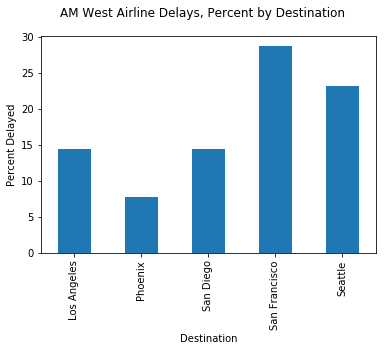

In [8]:
amwest_delays.plot.bar()
plt.suptitle('AM West Airline Delays, Percent by Destination')
plt.ylabel('Percent Delayed')
plt.show()

We notice that the bar charts are very similar to each other, though the y-axis shows that AM West has higher delay percentages across all destinations.  From this analysis, we conclude that San Francisco is the number one trouble spot for both airlines.